** Problem Statement**   Accurate sales forecasting allows the company to manage inventory, predict revenue, and make informed decisions regarding new investments. Achieving predetermined targets early in the season can positively influence stock prices and shape investors' perceptions. On the other hand, missing these projections could significantly harm stock prices, which would be particularly detrimental for a large company like Walmart.

**Aim:** To develop a model that can forecast store sales based on past sales patterns. With this model, decision-makers can make critical business decisions, maximize revenue, and improve sales in underperforming departments.

In [1]:
#Generating a python script to run a model using RandomForest Technique to Predict the Sales

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files
uploaded = files.upload()
data=pd.read_csv(next(iter(uploaded.keys())))
print(data.head())
print(data.info())
print(data.describe())

Saving features.csv to features.csv
   Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1   2/5/2010        42.31       2.572        NaN        NaN        NaN   
1      1  2/12/2010        38.51       2.548        NaN        NaN        NaN   
2      1  2/19/2010        39.93       2.514        NaN        NaN        NaN   
3      1  2/26/2010        46.63       2.561        NaN        NaN        NaN   
4      1   3/5/2010        46.50       2.625        NaN        NaN        NaN   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  Weekly_Sales  
0        NaN        NaN  211.096358         8.106      False      24924.50  
1        NaN        NaN  211.242170         8.106       True      46039.49  
2        NaN        NaN  211.289143         8.106      False      41595.55  
3        NaN        NaN  211.319643         8.106      False      19403.54  
4        NaN        NaN  211.350143         8.106      False      21827.90  
<class 'pandas.

In [2]:
data['Date'] = pd.to_datetime(data['Date'])
data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year
data.head()

#Drop the columns in the dataset
data.drop(['MarkDown1',	'MarkDown2',	'MarkDown3',	'MarkDown4', 'MarkDown5'], axis=1, inplace=True)
print(data.head())


   Store       Date  Temperature  Fuel_Price         CPI  Unemployment  \
0      1 2010-02-05        42.31       2.572  211.096358         8.106   
1      1 2010-02-12        38.51       2.548  211.242170         8.106   
2      1 2010-02-19        39.93       2.514  211.289143         8.106   
3      1 2010-02-26        46.63       2.561  211.319643         8.106   
4      1 2010-03-05        46.50       2.625  211.350143         8.106   

   IsHoliday  Weekly_Sales  day  month  year  
0      False      24924.50    5      2  2010  
1       True      46039.49   12      2  2010  
2      False      41595.55   19      2  2010  
3      False      19403.54   26      2  2010  
4      False      21827.90    5      3  2010  


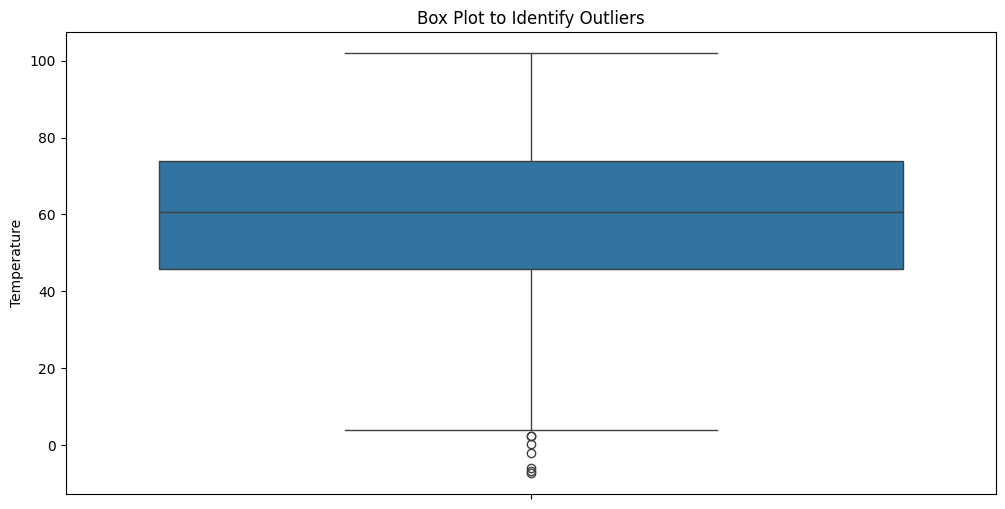

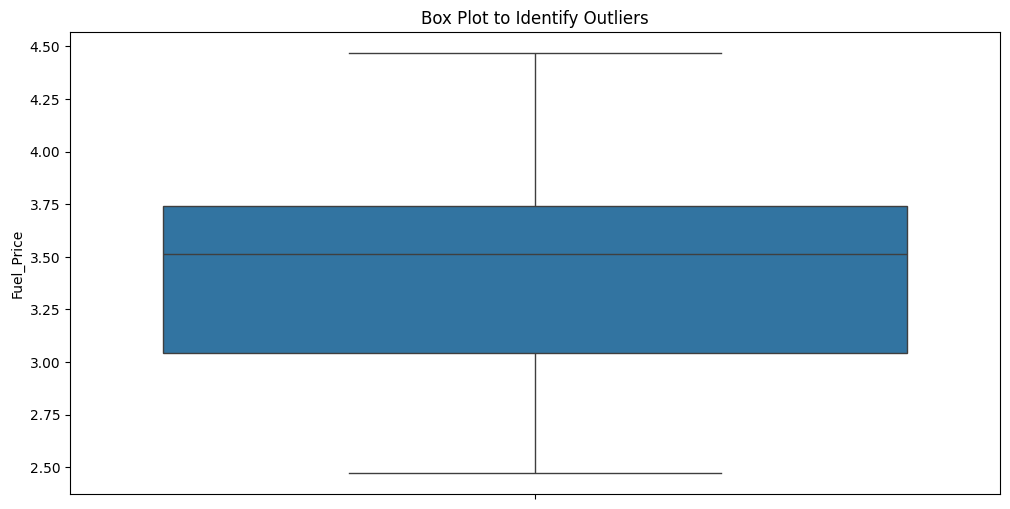

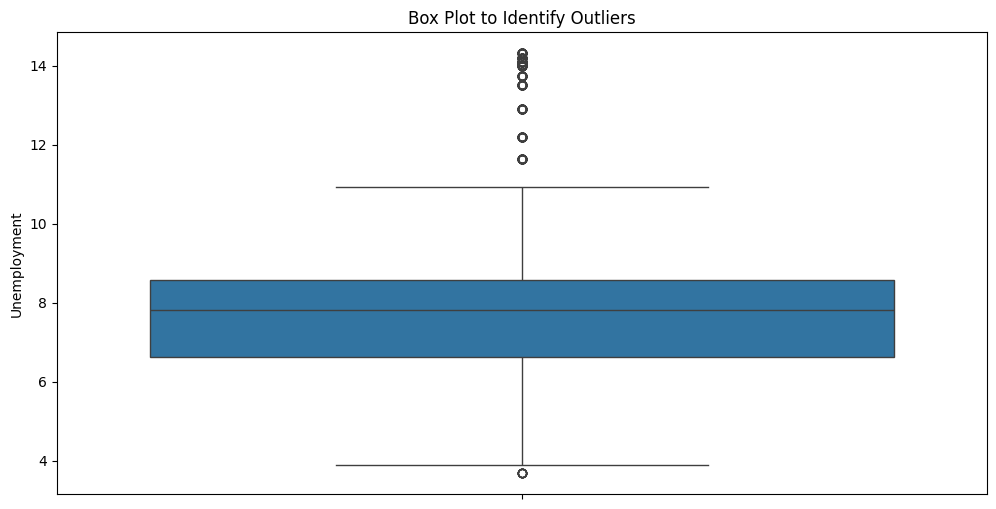

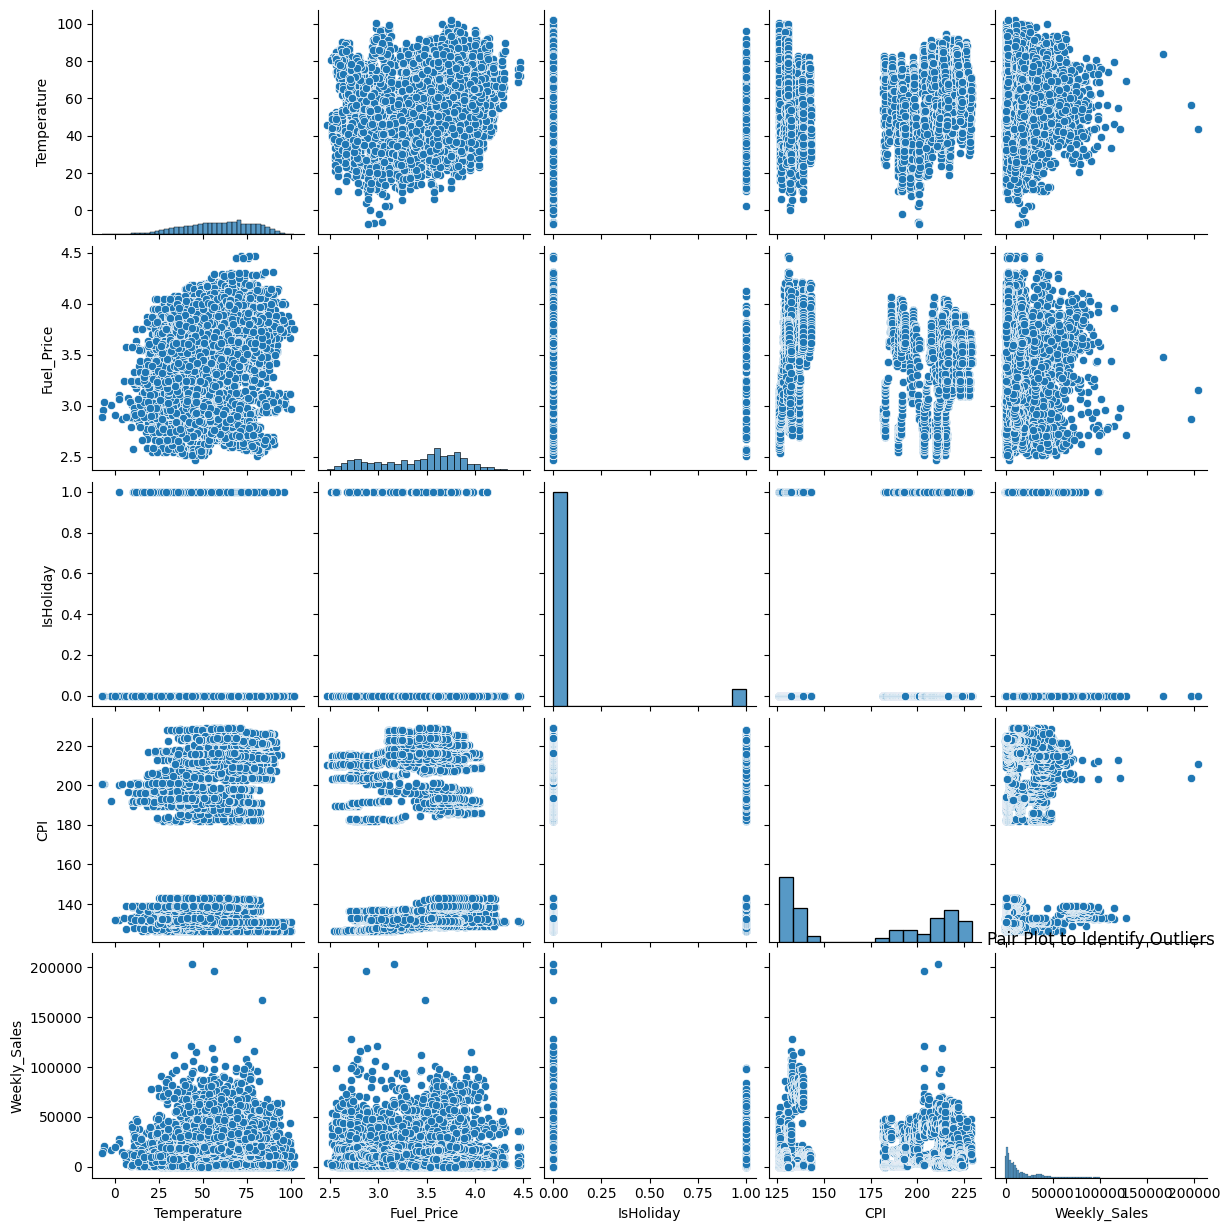

ValueError: Could not interpret value ` Weekly_Sales` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [3]:


#Find the outliers in the dataset

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize outliers using box plots

plt.figure(figsize=(12, 6))
sns.boxplot(data=data['Temperature'])
plt.title('Box Plot to Identify Outliers')
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(data=data['Fuel_Price'])
plt.title('Box Plot to Identify Outliers')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=data['Unemployment'])
plt.title('Box Plot to Identify Outliers')
plt.show()

# Visualize outliers using pair plots
sns.pairplot(data[['Temperature', 'Fuel_Price', 'IsHoliday', 'CPI', 'Weekly_Sales']])  # Specify the features for the pair plot
plt.title('Pair Plot to Identify Outliers')
plt.show()


# Adjusted code for creating the plots based on provided column names
# Scatter plot: CPI vs. Fuel Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Fuel_Price', y=' Weekly_Sales')
plt.title(' Weekly_Sales vs. Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel(' Weekly_Sales')
plt.show()

# Histogram:  Weekly_Sales on Holidays vs. Non-Holidays
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x=' Weekly_Sales', hue='IsHoliday', bins=30, kde=True)
plt.title(' Weekly_Sales on Holidays vs. Non-Holidays')
plt.xlabel('Week')
plt.ylabel('Frequency')
plt.show()

'''
# Histogram: CPI on Holidays vs. Non-Holidays
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x=' Weekly_Sales', hue='IsHoliday', bins=30, kde=True)  # Stacked histogram for holidays with KDE
plt.title(' Weekly_Sales on Holidays vs. Non-Holidays')
plt.xlabel(' Weekly_Sales')
plt.ylabel('Frequency')
'''

# Manually create a legend
plt.legend(title='Holiday', labels=['Non-Holiday (0)', 'Holiday (1)'])
plt.show()

# Histogram: CPI by Day of the Month
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x=' Weekly_Sales', bins=30, discrete=True)  # Regular histogram for CPI by day
plt.title(' Weekly_Sales Distribution by Day of the Month')
plt.xlabel(' Weekly_Sales')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Histogram: CPI by Month
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x=' Weekly_Sales', bins=30)  # Regular histogram for CPI by month
plt.title('CPI Distribution by Month')
plt.xlabel(' Weekly_Sales')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Line plot: CPI over Years
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='year', y=' Weekly_Sales')
plt.title('CPI over Years')
plt.xlabel('Year')
plt.ylabel(' Weekly_Sales')
plt.show()




In [ ]:
data.dropna(subset=['CPI'], inplace=True)  # Assuming 'CPI' is your target variable

# Preparing features and target
features = data[['Temperature', 'Fuel_Price', 'Unemployment', 'IsHoliday', 'day', 'month', 'year', 'CPI']]
target = data[' Weekly_Sales']

# Handling NaN values in features
for column in features.columns:
    if features[column].isnull().any():
        features[column].fillna(features[column].mean(), inplace=True)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
!pip install lazypredict
from lazypredict.Supervised import LazyRegressor # Import LazyRegressor
lazy= LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = lazy.fit(X_train, X_test, y_train, y_test)
print(models)


In [ ]:
#Random_Forest

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MSE:", mse)
print("R^2:", r2)

**Interpretation**:

**Value: 157.5676530883926**

The MSE tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the "errors") and squaring them. The squaring is necessary to remove any negative signs. It also gives more weight to larger differences. A smaller MSE is better because it indicates that the data points are closer to the regression line. The value you have (around 157.57) needs to be evaluated in the context of your data's scale and range. If the range of your target variable (CPI) is very large, then an MSE of 157.57 might not be that high. But if the target values range around a smaller scale, this could be considered high.

**R² of 90.04% **

Is quite high. This value indicates that approximately 90% of the variance in your dependent variable (CPI) can be explained by the model's inputs (Temperature, Fuel_Price, Unemployment, IsHoliday, day, month, year). An R² value close to 100% means that the model explains almost all the variability of the response data around its mean. However, it is crucial to note that a high R² does not necessarily imply that the model is good. R² can sometimes be misleadingly high in models with many variables or when using certain types of models that tend to fit to all possible data points (overfitting).

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming your data is loaded and preprocessed as before
# Defining an expanded and modified parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700],  # Increased upper limit
    'max_features': ['auto', 'sqrt', 'log2', None],  # Added None
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70],  # Added more depths
    'min_samples_split': [2, 5, 10, 15],  # Added more options
    'min_samples_leaf': [1, 2, 4, 6]  # Added more options
}

# Create a RandomForestRegressor object
rf = RandomForestRegressor(random_state=42)

# Set up RandomizedSearchCV with more iterations and increased cross-validation folds
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_dist,
                                   n_iter=200,  # Increased number of iterations
                                   cv=10,       # Increased number of folds for better generalization check
                                   verbose=2,   # Higher verbosity for more detailed output
                                   random_state=42,
                                   n_jobs=-1)   # Use all available cores

# Fit the random search model
random_search.fit(X_train, y_train)

# Best model after random search
best_rf = random_search.best_estimator_

# Predictions
predictions = best_rf.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Best Parameters:", random_search.best_params_)
print("MSE:", mse)
print("R^2:", r2)